# Typhoons in Hong Kong

The Hong Kong Observatory issues warning signals when typhoons approach. The highest warning signal is Signal No.10.

a) Go to https://www.weather.gov.hk/en/informtc/historical_tc/metinfo_wind.htm. The first table records information of typhoons that required Signal No. 10 since 1946. Write a function typhoon_data() that gets the data with Beautiful Soup, puts them in a Pandas data frame, and returns the data frame.

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def typhoon_data():
    url = 'https://www.weather.gov.hk/en/informtc/historical_tc/metinfo_wind.htm'
    r = requests.get(url)
    html_doc = r.text
    html_soup = BeautifulSoup(html_doc,'lxml') 
    table = html_soup.find_all('table')[0] 

    df = pd.read_html(str(table), header=None)[0] #transform into DataFrame
    table_id = []
    
    for i in range(13):
        table_id.append(html_soup.select('th')[i]['id'])
    col = [(table_id[0], table_id[0]),\
           (table_id[1], table_id[4]),\
           (table_id[1], table_id[5]),\
           (table_id[1], table_id[6]),\
           (table_id[1], table_id[7]),\
           (table_id[2], table_id[8]),\
           (table_id[2], table_id[9]),\
           (table_id[3], table_id[10]),\
           (table_id[3], table_id[11]),\
           (table_id[3], table_id[12])]
    
    df.columns = pd.MultiIndex.from_tuples(col)
    df.set_index((table_id[0], table_id[0]))
    return df.set_index((table_id[0], table_id[0]))


In [3]:
typhoon_data()

nearest                             min              max  \
                date  year direction distance hourly   inst  category   
(name, name)                                                            
-               18/7  1946         S       70  985.7      -         &   
Gloria          22/9  1957        SW       55  986.2  984.3  Severe T   
Mary             9/6  1960       WNW       10  974.3  973.8         T   
Alice           19/5  1961         -        0  981.6  981.1         T   
Wanda            1/9  1962       SSW       20  955.1  953.2   Super T   
Ruby             5/9  1964        SW       30  971.0  968.2   Super T   
Dot            13/10  1964         E       35  978.9  977.3         T   
Shirley         21/8  1968         -        0  968.7  968.6         T   
Rose            17/8  1971       WSW       20  984.5  982.8   Super T   
Elsie          14/10  1975         S       50  996.4  996.2         T   
Hope             2/8  1979       NNW       10  961.8  961.6   Super T   
Ellen            9/9  1983        SW       45  983.9  983.1  Severe T   
York            16/9  1999       SSW       20  976.8  976.1         T   
Vicente         24/7  2012        SW      100  986.3  986.0  Severe T   
Hato            23/8  2017       SSW       60  986.7  986.3   Super T   
Mangkhut        16/9  2018       SSW      100  977.6  977.0   Super T   

                                     
             max_sustained max_mean  
(name, name)                         
-                        &        &  
Gloria                 155      980  
Mary                   140      970  
Alice                  120      980  
Wanda                  185      950  
Ruby                   195      960  
Dot                    145      975  
Shirley                145      965  
Rose                   185      960  
Elsie                  140      985  
Hope                   205      940  
Ellen                  165      960  
York                   130      965  
Vicente                155      950  
Hato                   185      950  
Mangkhut               185      945

b) Hato (天鴿) and Mangkhut (山竹) are the two strongest typhoons in recent years. The webpages https://ibtracs.unca.edu/index.php?name=v04r00-2017232N19130 and https://ibtracs.unca.edu/index.php?name=v04r00-2018250N12170 record their paths. At the bottom of the pages, “HKO LAT” and “HKO LON” represent their latitudes and longitudes as measured by the Hong Kong Observatory. Get the data with Beautiful Soup, then create a GIF image or an MP4 video that plot their paths.

In [4]:
import copy
import os
import matplotlib.pyplot as plt                                          
import numpy as np

In [5]:
#%% get data
# Hato data
def Hato_data():
    url1 = 'https://ibtracs.unca.edu/index.php?name=v04r00-2017232N19130'
    r1 = requests.get(url1)
    html_doc1 = r1.text
    soup1 = BeautifulSoup(html_doc1,'lxml')
    html_table1 = soup1.find_all('table')[5] 
    df1 = pd.read_html(str(html_table1), header=None)[0]
    Hato = pd.DataFrame(df1, columns=["HKO LAT", "HKO LON"])
    Hato.dropna(inplace=True)
    Hato = Hato[1:]  
    Hato = Hato.reset_index(drop = True)
    Hato["HKO LAT"] = Hato["HKO LAT"].astype('float') #degrees north
    Hato["HKO LON"] = Hato["HKO LON"].astype('float') #degrees east
    return Hato

In [6]:
Hato = Hato_data()
Hato

,HKO LAT,HKO LON
0,19.30,126.50
1,19.44,126.49
2,19.60,126.30
3,19.79,125.80
4,20.00,125.20
5,20.23,124.78
6,20.40,124.30
7,20.50,123.63
8,20.40,122.80
9,19.91,121.74


In [7]:
# Mangkhut data
def Mangkhut_data():
    url2 = 'https://ibtracs.unca.edu/index.php?name=v04r00-2018250N12170'
    r2 = requests.get(url2)
    html_doc2 = r2.text
    soup2 = BeautifulSoup(html_doc2,'lxml')
    table2 = soup2.find_all('table')[5] 
    df2 = pd.read_html(str(table2), header=None)[0]
    Mangkhut = pd.DataFrame(df2, columns=["HKO LAT", "HKO LON"])
    Mangkhut.dropna(inplace=True)
    Mangkhut = Mangkhut[1:] #drop the first line
    Mangkhut = Mangkhut.reset_index(drop = True)
    Mangkhut["HKO LAT"] = Mangkhut["HKO LAT"].astype('float') #degrees north
    Mangkhut["HKO LON"] = Mangkhut["HKO LON"].astype('float') #degrees east
    return Mangkhut

In [8]:
Mangkhut = Mangkhut_data()
Mangkhut

,HKO LAT,HKO LON
0,12.20,166.30
1,12.62,165.98
2,12.90,165.50
3,12.96,164.76
4,13.00,163.90
...,...,...
85,22.60,109.30
86,22.80,108.60
87,23.20,108.10
88,23.70,107.30


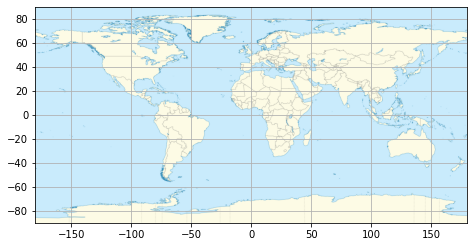

In [9]:
#%% background
img_plt = plt.imread("./equirectangular_map.png")
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
plt.imshow(img_plt , cmap=plt.cm.binary,extent=[-180,180,-90,90])
plt.grid(True)
plt.show()

An equirectangular world map. Letting north and east be positive, the latitudes of the top and the bottom of the map are respectively 90
(degrees) and −90 (degrees), and the longitudes of the left and the right of the map are respectively −180 (degrees) and 180 (degrees).

In [10]:
#%% syncronized

hk_location = [22.15, 114.10]

# define the time when typhoon reach hongkong
dis_m=np.zeros(len(Mangkhut))

for i in range(1, len(Mangkhut)):
    dis_m[i] = np.sqrt((hk_location[0] - Mangkhut["HKO LAT"][i])**2 + \
                     (hk_location[1] - Mangkhut["HKO LON"][i])**2)
dis_m[0]=30
a=min(dis_m)
dis_m=dis_m.tolist()
mku_land=dis_m.index(a)

dis_h=np.zeros(len(Hato))
for j in range(1, len(Hato)):
    dis_h[j] = np.sqrt((hk_location[0] - Hato["HKO LAT"][j])**2 + \
                      (hk_location[1] - Hato["HKO LON"][j])**2)
dis_h[0]=30
b=min(dis_h)
dis_h=dis_h.tolist()
hato_land=dis_h.index(b)


# Calculate h with respect to both typhoon
mku_timeline = [3 * (i - mku_land) for i in range(1, len(Mangkhut))]
hato_timeline = [3 * (i - hato_land) for i in range(1, len(Hato))]
same = [i for i in mku_timeline if i in hato_timeline]
mku_diff= [i for i in mku_timeline if i not in same]
overall_timeline = mku_timeline+hato_timeline
overall_timeline = list(set(overall_timeline))
overall_timeline.sort()

In [11]:
#%% frame

figure_save_path = "./question2"
i = 0
plt.figure(dpi = 150)
orange = np.array([237,149,100]) / 255
blue = np.array([0 ,140, 255]) / 255
plt.imshow(img_plt , cmap=plt.cm.binary,extent=[-180,180,-90,90])
plt.grid(True)
s1 = plt.scatter(0,0,s =1,facecolors=blue,label = 'Hato')
s2 = plt.scatter(0,0,s =1,facecolors=orange,label = 'Mangkhut')
plt.legend(fontsize = 'small',frameon = False)
s1.remove()
s2.remove()

plt.xlim(90,180)
plt.ylim(0,30)

for h in overall_timeline:
    #fig=plt.figure()
    #ax=fig.add_axes([0,0,1,1])
    
    if h in same:
        
        plt.scatter(Hato["HKO LON"][int(h / 3 + hato_land)],\
                    Hato["HKO LAT"][int(h / 3 + hato_land)],\
                        s =1,facecolors=blue,label = 'Hato')
        
        # Mangkhut
        plt.scatter(Mangkhut["HKO LON"][int(h / 3 + mku_land)],\
                    Mangkhut["HKO LAT"][int(h / 3 + mku_land)],\
                        s =1,facecolors=orange,label = 'Mangkhut')
    elif h in mku_diff:
        plt.scatter(Mangkhut["HKO LON"][int(h / 3 + mku_land)],\
                    Mangkhut["HKO LAT"][int(h / 3 + mku_land)],\
                        s =1,facecolors=orange,label = 'Mangkhut')        

    else:
        plt.scatter(Hato["HKO LON"][int(h / 3 + hato_land)],\
                    Hato["HKO LAT"][int(h / 3 + hato_land)],\
                        s =1,facecolors=blue,label = 'Hato')        

   
    tx = plt.text(90,32,'h = %d' %(h))

    if not os.path.exists(figure_save_path):
        os.makedirs(figure_save_path)
    
    plt.savefig(os.path.join(figure_save_path , str(i) + '.png'))
    tx.remove()
    #plt.close()
    i += 1
    
plt.close()

In [12]:
#%% animation

from PIL import Image
images = []
path = ".\question2"
files = os.listdir(path)
for i in range(89):
    filename = os.path.join(path, str(i) + '.png')
    im = Image.open(filename)
    im = im.convert("RGB")
    images.append(im)
    
images[0].save('Typhoon_path.gif',\
               save_all=True ,\
                   append_images = images, \
               duration= 0.3 * 1000)


Figure 5 shows three example frames. The variable ℎ means “hours after it struck Hong Kong”, and ℎ = 0 refers to the time when the typhoon was closest to Hong Kong, so ℎ = −15 and ℎ = 15 respectively means 15 hours before and after their strikes. In your GIF or MP4, every elapsed hour should last 0.1 seconds, so it should spend 1.5 seconds moving from the frame at ℎ = 0 to the frame at ℎ = 15.